# Telecom Churn CaseStudy

## Welcome to the case study module on Telecom Churn Prediction!

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.
This case study is slightly different from the other assignments and case studies that you would have attempted in the previous modules. This time around, we are offering this case study in the form of a Kaggle competition. Kaggle is an online community for data scientists offering ML competitions, data sets, notebooks, and micro-courses. Kaggle competitions are quite popular among top data science enthusiasts and recruiters, and therefore, they will become an indispensable part of your data science learning and career path.
First, you will learn about Kaggle, its features, how to operate the interface, the various services it offers, and most importantly about its competitions. After this, you will attempt a competition based on the churn prediction problem on the Kaggle platform.

In [200]:
#Import all library

#Import all the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, GridSearchCV,cross_val_score, train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


#from sklearn import metrics

import os 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [318]:
df = pd.read_csv("train.csv")
unseen = pd.read_csv("test (1).csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")
print(df.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [202]:
data_dict

In [316]:
test1 = pd.read_csv("test (1).csv")

In [317]:
test1.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [203]:
df = df.set_index("id")
df.head()


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.9+ MB


In [205]:
df.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,6.410000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,115.060000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [206]:
df.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=171)

In [207]:
df.dtypes

circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
                         ...   
aon                       int64
aug_vbc_3g              float64
jul_vbc_3g              float64
jun_vbc_3g              float64
churn_probability         int64
Length: 171, dtype: object

In [208]:
# Checking the percentage of missing values
#round(100*(df.isnull().sum()/len(df.index)), 2)

In [209]:
#missing value in percentage
print(round(100*(df.isnull().sum()[df.isnull().sum()>0]/len(df.index)), 2))
#print(df.isnull().sum()[df.isnull().sum()>0])

loc_og_t2o_mou           1.00
std_og_t2o_mou           1.00
loc_ic_t2o_mou           1.00
last_date_of_month_7     0.57
last_date_of_month_8     1.05
                        ...  
night_pck_user_7        74.48
night_pck_user_8        73.69
fb_user_6               74.90
fb_user_7               74.48
fb_user_8               73.69
Length: 125, dtype: float64


In [210]:
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, 1, inplace=True)

In [211]:
#Again checking missing value in percentage
print(round(100*(df.isnull().sum()[df.isnull().sum()>0]/len(df.index)), 2))

loc_og_t2o_mou          1.00
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
                        ... 
ic_others_6             3.95
ic_others_7             3.84
date_of_last_rech_6     1.57
date_of_last_rech_7     1.76
date_of_last_rech_8     3.52
Length: 66, dtype: float64


In [212]:
df.shape

(69999, 112)

In [213]:


# Dropping unique valued columns
df1= df.drop(["circle_id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou",
                  "last_date_of_month_6","last_date_of_month_7","last_date_of_month_8",
                  "std_og_t2c_mou_6","std_og_t2c_mou_7","std_ic_t2o_mou_6","std_ic_t2o_mou_7",],axis=1)



In [214]:
print(round(100*(df1.isnull().sum()[df1.isnull().sum()>0]/len(df1.index)), 2))

onnet_mou_6            3.95
onnet_mou_7            3.84
offnet_mou_6           3.95
offnet_mou_7           3.84
roam_ic_mou_6          3.95
roam_ic_mou_7          3.84
roam_og_mou_6          3.95
roam_og_mou_7          3.84
loc_og_t2t_mou_6       3.95
loc_og_t2t_mou_7       3.84
loc_og_t2m_mou_6       3.95
loc_og_t2m_mou_7       3.84
loc_og_t2f_mou_6       3.95
loc_og_t2f_mou_7       3.84
loc_og_t2c_mou_6       3.95
loc_og_t2c_mou_7       3.84
loc_og_mou_6           3.95
loc_og_mou_7           3.84
std_og_t2t_mou_6       3.95
std_og_t2t_mou_7       3.84
std_og_t2m_mou_6       3.95
std_og_t2m_mou_7       3.84
std_og_t2f_mou_6       3.95
std_og_t2f_mou_7       3.84
std_og_mou_6           3.95
std_og_mou_7           3.84
isd_og_mou_6           3.95
isd_og_mou_7           3.84
spl_og_mou_6           3.95
spl_og_mou_7           3.84
og_others_6            3.95
og_others_7            3.84
loc_ic_t2t_mou_6       3.95
loc_ic_t2t_mou_7       3.84
loc_ic_t2m_mou_6       3.95
loc_ic_t2m_mou_7    

In [215]:
# Checking the percentage of missing values again
round(100*(df1.isnull().sum()/len(df1.index)), 2)


arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
onnet_mou_6          3.95
onnet_mou_7          3.84
                     ... 
aon                  0.00
aug_vbc_3g           0.00
jul_vbc_3g           0.00
jun_vbc_3g           0.00
churn_probability    0.00
Length: 101, dtype: float64

In [216]:
df1.shape

(69999, 101)

In [217]:
# Drop all the columns which are greater than equal to 2687 missing values are present

for col in df1.columns:
    if df1[col].isnull().sum() >= 2500:
        df1.drop(col, 1, inplace=True)


In [218]:
# # checking the null values again
df1.isnull().sum().head(100).sort_values(ascending = False)


date_of_last_rech_8    2461
date_of_last_rech_7    1234
date_of_last_rech_6    1101
arpu_6                    0
sachet_2g_7               0
vol_3g_mb_6               0
vol_3g_mb_7               0
vol_3g_mb_8               0
monthly_2g_6              0
monthly_2g_7              0
monthly_2g_8              0
sachet_2g_6               0
sachet_2g_8               0
vol_2g_mb_7               0
monthly_3g_6              0
monthly_3g_7              0
monthly_3g_8              0
sachet_3g_6               0
sachet_3g_7               0
sachet_3g_8               0
aon                       0
aug_vbc_3g                0
jul_vbc_3g                0
jun_vbc_3g                0
vol_2g_mb_8               0
last_day_rch_amt_8        0
vol_2g_mb_6               0
total_rech_num_7          0
arpu_8                    0
total_og_mou_6            0
total_og_mou_7            0
total_og_mou_8            0
total_ic_mou_6            0
total_ic_mou_7            0
total_ic_mou_8            0
total_rech_num_6    

In [219]:
df1 = df1[~pd.isnull(df1["date_of_last_rech_8"])]
df1 = df1[~pd.isnull(df1["date_of_last_rech_7"])]
df1 = df1[~pd.isnull(df1["date_of_last_rech_6"])]

In [220]:
df1.shape

(65945, 47)

In [221]:
df1["date_of_last_rech_6"]= pd.to_datetime(df["date_of_last_rech_6"],format = "%m/%d/%Y")
df1["date_of_last_rech_7"]= pd.to_datetime(df["date_of_last_rech_7"],format = "%m/%d/%Y")
df1["date_of_last_rech_8"]= pd.to_datetime(df["date_of_last_rech_8"],format = "%m/%d/%Y")


# EDA Analysis

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

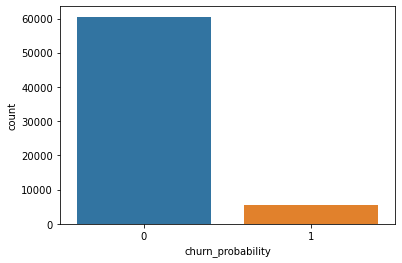

In [222]:
#Target variable 
sns.countplot(x="churn_probability",data = df1)

### 
As we can see churn rate is low in the overall dataset. So we would need to handle the class imbalance

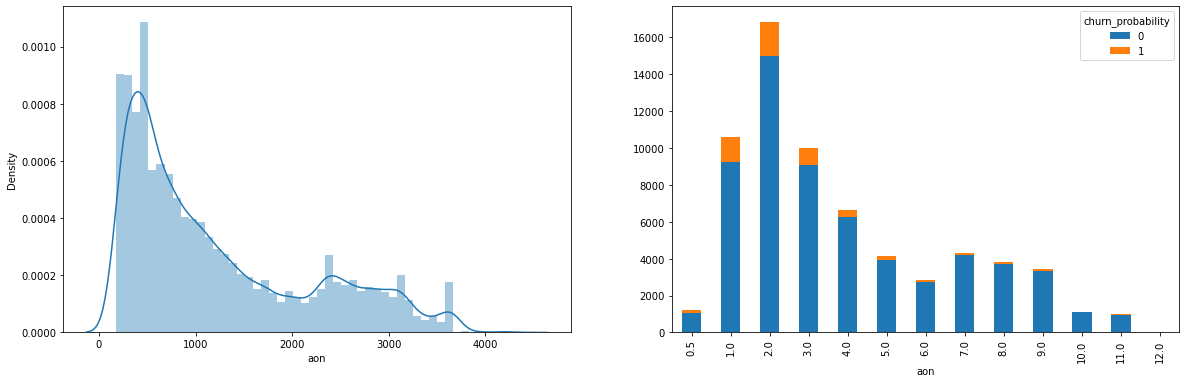

In [223]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(df1['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.crosstab(pd.cut(round(((df1['aon']/30)/12),1), bins = bins, labels = labels ), df1['churn_probability']).plot(kind='bar', stacked=True, ax = ax2)
plt.show()

### As per above bar plot indicates most of the churn seen in the age of 1-3

## Incoming calls usage

,total_ic_mou_6
count,65945.000000
mean,203.499284
std,290.283914
min,0.000000
25%,41.810000
50%,118.190000
75%,255.440000
max,7716.140000


,total_ic_mou_7
count,65945.000000
mean,208.366015
std,300.240737
min,0.000000
25%,46.210000
50%,121.840000
75%,256.960000
max,9699.010000


,total_ic_mou_8
count,65945.000000
mean,205.810730
std,292.082412
min,0.000000
25%,44.090000
50%,120.930000
75%,257.930000
max,10830.380000


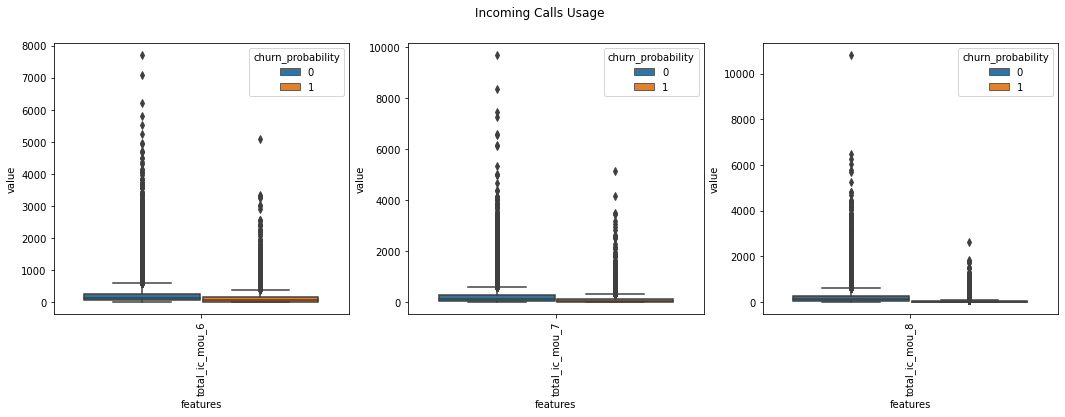

In [224]:
cols =[["total_ic_mou_6"],
      ["total_ic_mou_7"],["total_ic_mou_8"]]
#column description stats
for i in range(0,3):
    display(df1[cols[i]].describe())

# plot for the incoming calls usage
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([df1[cols[i]],df1['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability",data = X)
    plt.xticks(rotation=90)    
    plt.suptitle('Incoming Calls Usage')

In [225]:
### So, incoming call usage have outliers at the top percentile

In [226]:
## Outgoing calls usage

,total_og_mou_6
count,65945.000000
mean,312.659935
std,468.616515
min,0.000000
25%,47.810000
50%,149.530000
75%,383.540000
max,10674.030000


,total_og_mou_7
count,65945.000000
mean,321.711233
std,484.639874
min,0.000000
25%,49.110000
50%,150.740000
75%,397.090000
max,8285.640000


,total_og_mou_8
count,65945.000000
mean,315.425999
std,481.928555
min,0.000000
25%,45.780000
50%,148.080000
75%,386.980000
max,14043.060000


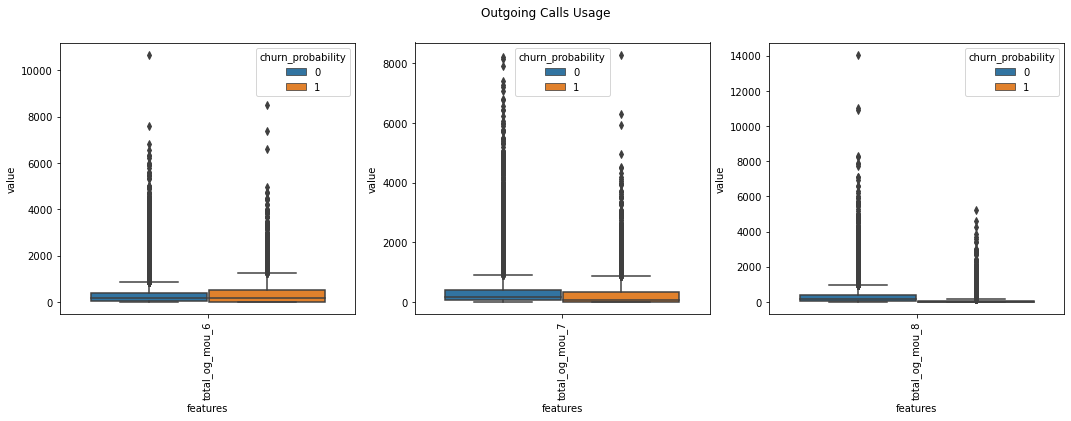

In [227]:
cols = [['total_og_mou_6'],
        ['total_og_mou_7'],
        ['total_og_mou_8']]
# column description stats
for i in range(0,3):
    display(df1[cols[i]].describe())

# plot for the outgoing calls usage
plt.figure(figsize=(18, 5))
#ic call usage
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([df1[cols[i]], df1['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Outgoing Calls Usage')



In [228]:
## Recharge Count

count    65945.000000
mean         7.755872
std          7.037206
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        170.000000
Name: total_rech_num_6, dtype: float64

count    65945.000000
mean         7.991372
std          7.073154
min          1.000000
25%          4.000000
50%          6.000000
75%         10.000000
max        138.000000
Name: total_rech_num_7, dtype: float64

count    65945.000000
mean         7.527576
std          7.197842
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        138.000000
Name: total_rech_num_8, dtype: float64

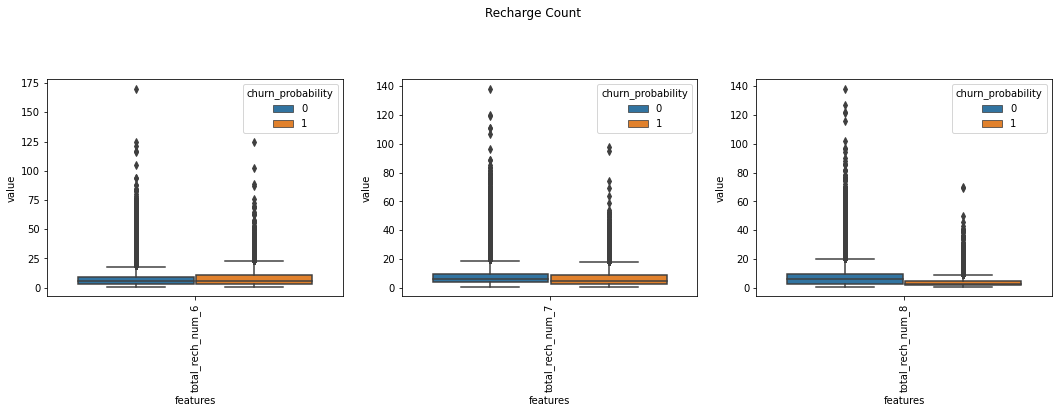

In [229]:
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
# column description stats
for i in range(0,3):
    display(df1[cols[i]].describe())

# plot for the recharge count columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,3):
    plt.subplot(2,3,i+1)
    X = pd.concat([df1[cols[i]], df1['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Recharge Count')

## Recharge count columns also seems to have outliers at the top percentile

## Recharge count columns also seems to have outliers at the top percentile

count    65945.000000
mean       287.297126
std        332.321661
min       -810.661000
25%         95.329000
50%        201.673000
75%        376.804000
max      27731.088000
Name: arpu_6, dtype: float64

count    65945.000000
mean       287.635352
std        347.882184
min       -622.509000
25%         94.529000
50%        200.707000
75%        375.538000
max      35145.834000
Name: arpu_7, dtype: float64

count    65945.000000
mean       289.113693
std        356.136185
min       -345.129000
25%         93.127000
50%        202.185000
75%        381.206000
max      33543.624000
Name: arpu_8, dtype: float64

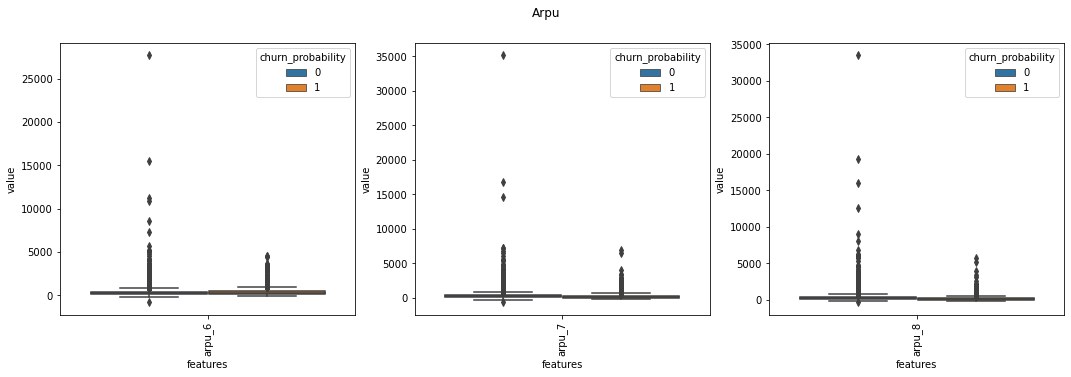

In [230]:
cols = ['arpu_6','arpu_7','arpu_8']
        

# column description stats
for i in range(0,3):
    display(df1[cols[i]].describe())

# plot for the arpu
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([df1[cols[i]], df1['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Arpu')

## Arpu also seems to have outliers at the top percentile

## 2G and 3G

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
count,69999.000000,69999.000000,69999.000000
mean,51.773924,51.240204,50.127506
std,212.513909,211.114667,213.101403
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,10285.900000,7873.550000,11117.610000


,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,69999.000000,69999.000000,69999.000000
mean,122.171882,128.934444,135.486541
std,554.869965,554.096072,568.310234
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,45735.400000,28144.120000,30036.060000


,monthly_2g_6,monthly_2g_7,monthly_2g_8
count,69999.000000,69999.000000,69999.000000
mean,0.079287,0.083401,0.080930
std,0.294719,0.304802,0.299254
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000


,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,69999.000000,69999.000000,69999.000000
mean,0.075815,0.077730,0.081958
std,0.358905,0.383189,0.381821
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,9.000000,16.000000,16.000000


,sachet_2g_6,sachet_2g_7,sachet_2g_8
count,69999.000000,69999.000000,69999.000000
mean,0.388863,0.441406,0.449492
std,1.494206,1.651012,1.632450
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,42.000000,48.000000,44.000000


,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,69999.000000,69999.000000,69999.000000
mean,0.075344,0.081444,0.085487
std,0.573003,0.634547,0.680035
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,29.000000,33.000000,41.000000


,jun_vbc_3g,jul_vbc_3g,aug_vbc_3g
count,69999.00000,69999.000000,69999.000000
mean,60.07674,65.935830,68.108597
std,257.22681,267.899034,269.328659
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000
max,11166.21000,9165.600000,12916.220000


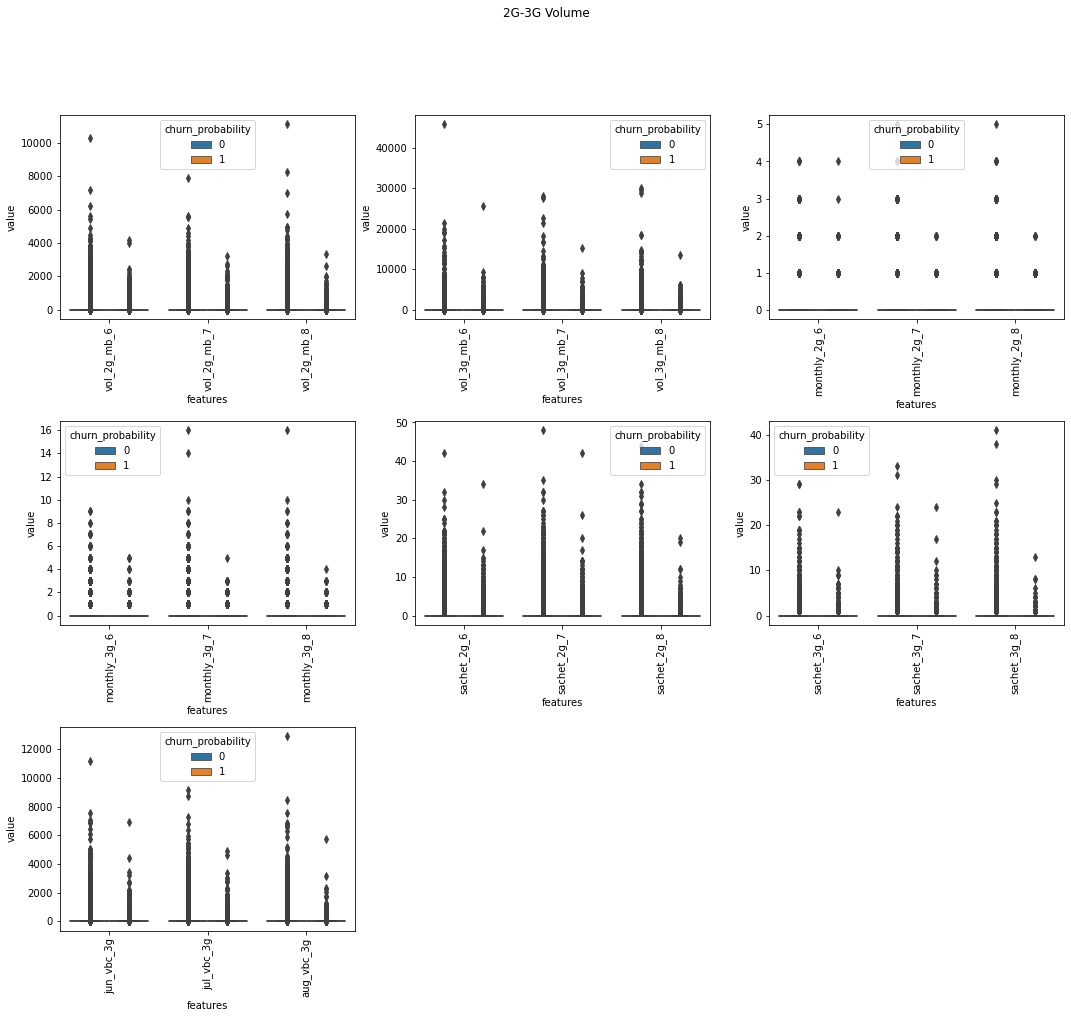

In [231]:
cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
       ]

# column description stats
for i in range(0,7):
    display(df[cols[i]].describe())

# plot for the 2g-3g volume
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5)
for i in range(0,7):
    plt.subplot(3,3,i+1)
    X = pd.concat([df1[cols[i]], df1['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('2G-3G Volume')

## 2G and 3G volume columns also seem to have outliers at the top percentile

## Outliers Treatment

## We need to cap the outliers

In [232]:
for col in df1.columns:
    percentiles = df1[col].quantile([0.01, 0.99]).values
    df1[col][df1[col] <= percentiles[0]] = percentiles[0]
    df1[col][df1[col] >= percentiles[1]] = percentiles[1]


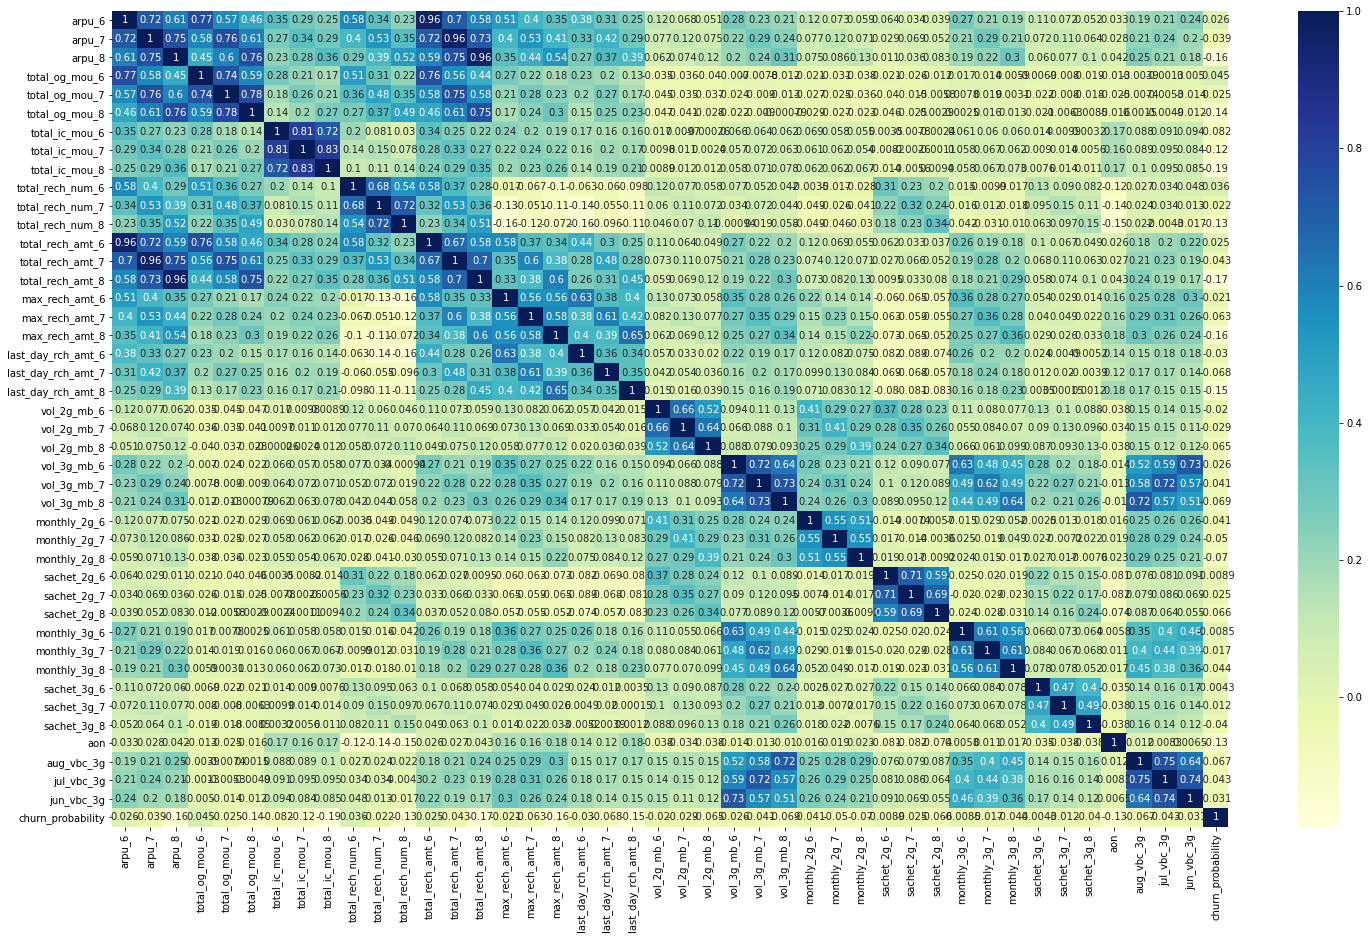

In [233]:


# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df1.corr(),cmap="YlGnBu", annot=True)
plt.show()



In [234]:


# storing the columns so that we can use those in unseen data 
# choosing the variables with less correlation among themselves
new_vars=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8','aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g']



# Feature Engineering

##  Earlier we have converted the date columns to datetime format , now we will extract the columns from last recharge date and days since last recharge

In [235]:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
# get the recent date of recharge in the last 3 months
df1['last_rech_date'] = df1[cols].max(axis=1)
# get the number of days from the recent recharge date till the last date of august month
df1['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - df1['last_rech_date'] ).astype('timedelta64[D]'))


In [236]:
# total columns
cols = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
df1['mean_total_ic_mou'] = round(df1[cols].mean(axis=1),2)
# Weightage for ic for the last 3 months
df = df1[cols].astype(bool)
df1['total_ic_weightage'] = ( df['total_ic_mou_6'] * 1 ) + ( df['total_ic_mou_7'] * 10 ) + ( df['total_ic_mou_8'] * 100 )

cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
df1['mean_total_og_mou'] = round(df1[cols].mean(axis=1),2)
# Weightage for og for the last 3 months
df = df1[cols].astype(bool)
df1['total_og_weightage'] = ( df['total_og_mou_6'] * 1 ) + ( df['total_og_mou_7'] * 10 ) + ( df['total_og_mou_8'] * 100 )

df1['mean_total_mou'] = df1['mean_total_ic_mou'] + df1['mean_total_og_mou']

df1['mean_total_mou_6'] = round(df1[['total_ic_mou_6','total_og_mou_6']].mean(axis=1),2)
df1['mean_total_mou_7'] = round(df1[['total_ic_mou_7','total_og_mou_7']].mean(axis=1),2)
df1['mean_total_mou_8'] = round(df1[['total_ic_mou_8','total_og_mou_8']].mean(axis=1),2)

In [237]:
## Numeric columns - Recharge

In [238]:
## We will extract the mean, min,max values of recharge related columns for the last three months (June,July,August)

In [239]:
# total_rech_num columns
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
# mean of total recharge number
df1['mean_total_rech_num'] = round(df1[cols].mean(axis=1),2)
# Minimum of total recharge number
df1['min_total_rech_num'] = df1[cols].min(axis=1)
# Maximum of total recharge number
df1['max_total_rech_num'] = df1[cols].max(axis=1)


In [240]:
# total_rech_amt columns
cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
df1['mean_total_rech_amt'] = round(df1[cols].mean(axis=1),2)
df1['min_total_rech_amt'] = df1[cols].min(axis=1)
df1['max_total_rech_amt'] = df1[cols].max(axis=1)


In [241]:
# max_rech_amt columns
cols = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
df1['mean_max_rech_amt'] = round(df1[cols].mean(axis=1),2)

# last_day_rch_amt columns
cols = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
df1['mean_last_day_rch_amt'] = round(df1[cols].mean(axis=1),2)

In [242]:
## Now we will extract the weightage for recharge count and amount columns for the last three months (June, July and August) in increasing order

In [243]:
#get recharge num weightage for the last three months
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
df = df1[cols].astype(bool)
df1['rech_num_weightage'] = ( df['total_rech_num_6'] * 1 ) + ( df['total_rech_num_7'] * 10 ) + ( df['total_rech_num_8'] * 100 )

In [244]:
#get recharge amount weightage for the last three months
cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
df = df1[cols].astype(bool)
df1['rech_amt_weightage'] = ( df['total_rech_amt_6'] * 1 ) + ( df['total_rech_amt_7'] * 10 ) + ( df['total_rech_amt_8'] * 100 )


In [245]:
# arpu columns
# ARPU = Total Revenue / Average Subscribers
cols = ['arpu_6','arpu_7','arpu_8']
df1['mean_arpu'] = round(df1[cols].mean(axis=1),2)

cols = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']
df1['mean_vol_2g_mb_data'] = round(df1[cols].mean(axis=1),2)

cols = ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
df1['mean_vol_3g_mb_data'] = round(df1[cols].mean(axis=1),2)

In [246]:
#get vbc mean for the last three months
cols = ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
df1['mean_vbc_3g'] = round(df1[cols].mean(axis=1),2)

In [247]:
#get monthly pack weightage for the last three months
df1['monthly_2g_weightage'] = ( df1['monthly_2g_6'] * 1 ) + ( df1['monthly_2g_7'] * 10 ) + ( df1['monthly_2g_8'] * 100 )
df1['monthly_3g_weightage'] = ( df1['monthly_3g_6'] * 1 ) + ( df1['monthly_3g_7'] * 10 ) + ( df1['monthly_3g_8'] * 100 )

#get sachet pack weightage for the last three months
df1['sachet_2g_weightage'] = ( df1['sachet_2g_6'] * 1 ) + ( df1['sachet_2g_7'] * 10 ) + ( df1['sachet_2g_8'] * 100 )
df1['sachet_3g_weightage'] = ( df1['sachet_3g_6'] * 1 ) + ( df1['sachet_3g_7'] * 10 ) + ( df1['sachet_3g_8'] * 100 )

In [248]:
df1.shape

(65945, 75)

## Feature Selection and Dimentionality Reduction using PCA 

## Let's take a backup so that we can use it for future for model 2

In [249]:
#Taking a backup of dataset for later use
m_df = df1.copy()

## Splitting the columns into categorical and numerical type

In [250]:
# prepare the dataset
churn = df1['churn_probability']
df1 = df1.drop('churn_probability', axis=1)
# we have to drop the date columns otherwise scaling and log transform is not possible
df1 = df1.drop("date_of_last_rech_6",axis = 1)
df1 = df1.drop("date_of_last_rech_7",axis = 1)
df1 = df1.drop("date_of_last_rech_8",axis = 1)
df1 = df1.drop("last_rech_date",axis = 1)

#split the columns into category and numerical
cat_cols = ['monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6',
            'monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7',
            'monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8'] 

In [251]:
num_cols = list(set(df1.columns).difference(set(cat_cols)))

In [252]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   arpu_6                 65945 non-null  float64
 1   arpu_7                 65945 non-null  float64
 2   arpu_8                 65945 non-null  float64
 3   total_og_mou_6         65945 non-null  float64
 4   total_og_mou_7         65945 non-null  float64
 5   total_og_mou_8         65945 non-null  float64
 6   total_ic_mou_6         65945 non-null  float64
 7   total_ic_mou_7         65945 non-null  float64
 8   total_ic_mou_8         65945 non-null  float64
 9   total_rech_num_6       65945 non-null  int64  
 10  total_rech_num_7       65945 non-null  int64  
 11  total_rech_num_8       65945 non-null  int64  
 12  total_rech_amt_6       65945 non-null  int64  
 13  total_rech_amt_7       65945 non-null  int64  
 14  total_rech_amt_8       65945 non-null  float64
 15  ma

## Dummy encode the categorical features

## Adding columns for each category using dummy encoding and drop the original columns

In [253]:
# dummy encode the categorical columns
df1 = pd.concat([df1,pd.get_dummies(df1[cat_cols], drop_first=True)], axis=1)

# drop the original columns
df1.drop(cat_cols, axis=1, inplace=True)


## Log Transform the numerical features

##  All the features are almost positively skewed, we'll log transform the numerical features to neutralize the positive skewness in the dataset.


In [254]:
# log transform with constant 10000 for real numbers
df1[num_cols] = np.log((10000 + df1[num_cols]))
df1 = np.log((10000 + df1))

In [255]:
#Standardize the numeric values
df1[num_cols] = (( df1[num_cols] - df1[num_cols].mean() ) / df1[num_cols].std())

# Model Building

## Split into train test

In [256]:
X = df1
Y = churn
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(46161, 58) (46161,)
(19784, 58) (19784,)


# PCA

# Now we will apply PCA on the training dataset for dimentionality reduction and feature selection


In [257]:
#initialize the pca with randomized
pca = PCA(svd_solver='randomized', random_state=42)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [258]:
pca.components_

array([[ 1.94988117e-01,  2.09541483e-01,  2.01307890e-01, ...,
         6.60904666e-02,  1.96286988e-02,  2.39690562e-02],
       [-4.06492294e-03, -1.21727759e-02, -4.37811110e-03, ...,
         1.86888003e-01, -2.00178647e-02,  4.28647822e-02],
       [ 3.92358597e-03,  1.16950716e-02,  1.59311901e-02, ...,
         7.12186090e-02,  1.91020792e-01,  1.35415264e-01],
       ...,
       [ 1.89272894e-01,  1.90456605e-01,  1.93244628e-01, ...,
         3.37072673e-05, -5.41247670e-05,  3.25641874e-05],
       [ 6.34069806e-04,  6.38713788e-04,  6.46953206e-04, ...,
        -1.37433617e-06,  2.07328234e-06,  1.49503338e-06],
       [ 0.00000000e+00, -6.77722576e-18,  2.67546702e-18, ...,
         1.14122659e-18,  4.56481528e-19, -1.00067302e-19]])

In [259]:
pca.explained_variance_ratio_

array([3.16880984e-01, 1.36203679e-01, 9.45872117e-02, 5.86020132e-02,
       5.53851630e-02, 4.77625181e-02, 2.63268508e-02, 2.35762109e-02,
       1.91872029e-02, 1.88196313e-02, 1.60023841e-02, 1.53449659e-02,
       1.47972289e-02, 1.45344041e-02, 1.26905877e-02, 1.25423426e-02,
       1.18059647e-02, 1.06543910e-02, 1.01472229e-02, 9.21767909e-03,
       8.30893941e-03, 8.00781425e-03, 6.67833740e-03, 6.49848002e-03,
       5.19273410e-03, 4.90999902e-03, 4.47561900e-03, 4.19571496e-03,
       4.05847066e-03, 3.20479778e-03, 3.03705381e-03, 2.87787193e-03,
       2.27707701e-03, 2.16998364e-03, 1.84507407e-03, 1.81350484e-03,
       1.58269336e-03, 1.18678572e-03, 8.76501376e-04, 6.48203299e-04,
       5.39509588e-04, 3.47744532e-04, 1.82577257e-04, 5.78526435e-06,
       3.46123661e-06, 2.31187706e-06, 8.79488645e-07, 8.51454288e-07,
       6.90342645e-07, 5.30880122e-07, 4.51575010e-07, 3.26242949e-07,
       2.44843927e-07, 1.73783901e-07, 9.85948783e-08, 6.80440343e-08,
      

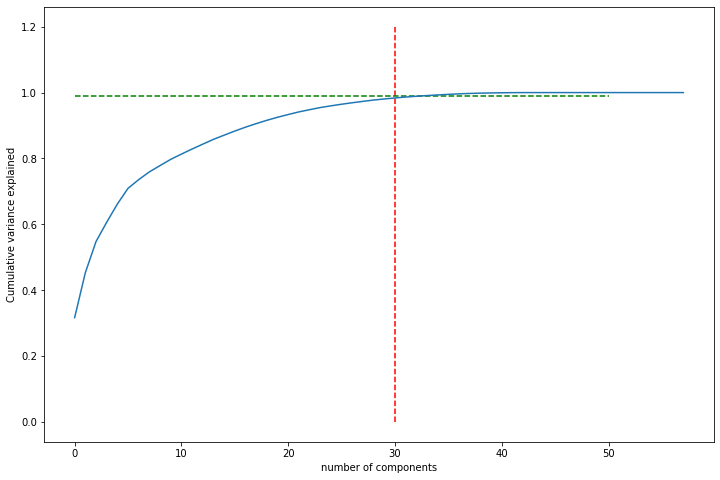

In [260]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1.2, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

## Will perform with 30 components

In [261]:
pca_final = IncrementalPCA(n_components=30)

In [262]:
df_train_pca = pca_final.fit_transform(X_train)

In [263]:
df_train_pca.shape

(46161, 30)

In [264]:
#correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())

In [265]:
#correlation matrix shape
corrmat.shape

(30, 30)

## Plotting the heatmap of the corr matrix

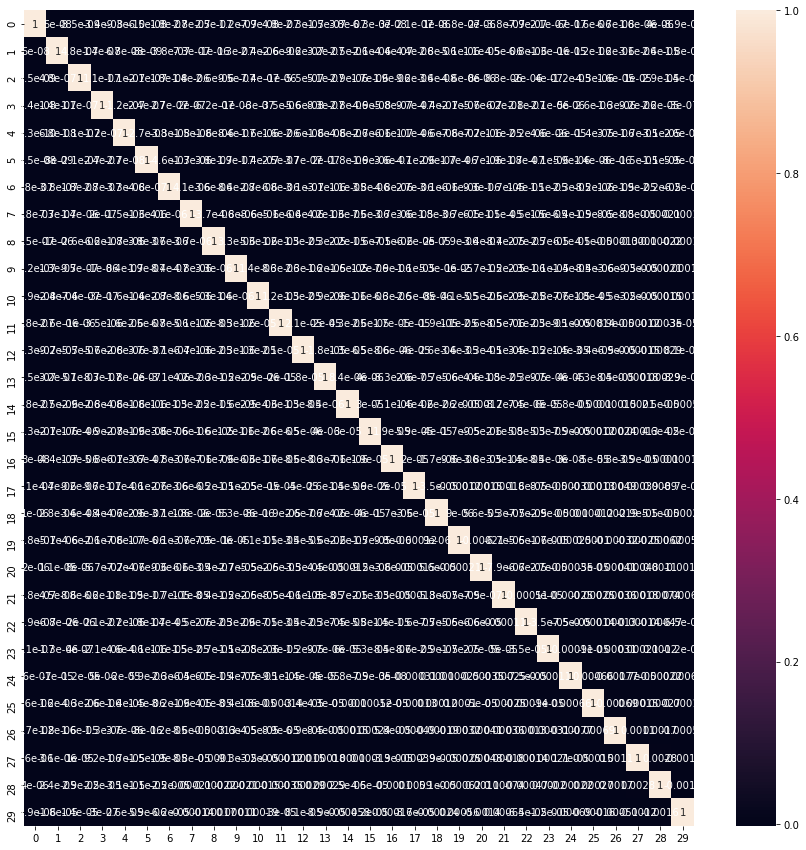

In [266]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [267]:
## We can see here no correlation is there in the given data frame

In [268]:
## Applying the transformation on the test set

In [269]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(19784, 30)

In [270]:
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

In [271]:
## BASE LINE MODELLING

In [272]:
# List to store the model scores
model_score_list = []

In [273]:
# Will create a function and call it again and again for different models
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

# Logistic Regression

In [274]:
# Initialize the Logistic regression
model1 = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
model1.fit(df_train_pca, Y_train)
# predict the testing pca data
Y_pred = model1.predict(df_test_pca)
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  88.48
ROC AUC score :  82.01
Precision score :  39.66
Recall score :  74.25


# Random Forest

In [275]:
# initialize the randomforest
model2 = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
model2.fit(df_train_pca, Y_train)
# predict the pca testing data
Y_pred = model2.predict(df_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  93.95
ROC AUC score :  70.61
Precision score :  73.45
Recall score :  42.6


# Model Score List

In [276]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['acc_score','roc_score'], ascending=False)



,model_name,acc_score,roc_score,precision_score,recall_score
1,RandomForestClassifier,93.95,70.61,73.45,42.60
0,LogisticRegression,88.48,82.01,39.66,74.25


## So, here we can see RANDOM FOREST CLASSIFIER is giving more Accuracy Score with 93.95%


# CROSS VALIDATION

In [277]:
#Cross val score for Logistic regression
cross_val_score(model1, X_train, Y_train, cv=5, n_jobs=-1)
cross_val_score(model1, X_train, Y_train, cv=5, n_jobs=-1).mean()

0.8796820861085088

In [278]:
#Cross val score for Random Forest Classifier
cross_val_score(model2, X_train, Y_train, cv=5, n_jobs=-1)
cross_val_score(model2, X_train, Y_train, cv=5, n_jobs=-1).mean()

0.9424406295630492

## Since it is more important to identify churners than the non-churners accurately, we go with the RandomForestClassifier which has high accuracy score and CV score

## Hyperparameter tuning for Randomforest Classifiers

In [279]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [280]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [281]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [282]:
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [283]:
GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [284]:
# print the grid results
print('\n Best estimator:')
print(model_cv.best_estimator_)
print('\n Best score:')
print(model_cv.best_score_ * 2 - 1)
print('\n Best parameters:')
print(model_cv.best_params_)


 Best estimator:
RandomForestClassifier(max_depth=15, max_features=15, min_samples_leaf=20,
                       n_estimators=25, n_jobs=-1, random_state=42)

 Best score:
0.8887372755512448

 Best parameters:
{'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 20, 'n_estimators': 25}


## The best score we got using GridSearchCV is 88.87% and best parameters are - {'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 20, 'n_estimators': 25}
Now let's try fitting the best estimator and predict the results


## Fitting the Best Estimator

In [285]:
# initialize the model with the best estimor
model = model_cv.best_estimator_

# fit the pca training dataset
model.fit(df_train_pca, Y_train)

# Predict the model with the pca testing dataset
Y_pred = model.predict(df_test_pca)

# get the predict probablities of pca testing dataset
Y_pred_proba = model.predict_proba(df_test_pca)


## Model Evaluation

In [286]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [287]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(Y_test, Y_pred))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)



Classification Report : 

               precision    recall  f1-score   support

           0       0.95      0.98      0.97     18141
           1       0.73      0.48      0.58      1643

    accuracy                           0.94     19784
   macro avg       0.84      0.73      0.77     19784
weighted avg       0.94      0.94      0.94     19784


TN = 17842, FP = 299, FN = 853, TP = 790


Accuracy Score :  94.18
ROC AUC score :  73.22
Precision score :  72.54
Recall score :  48.08


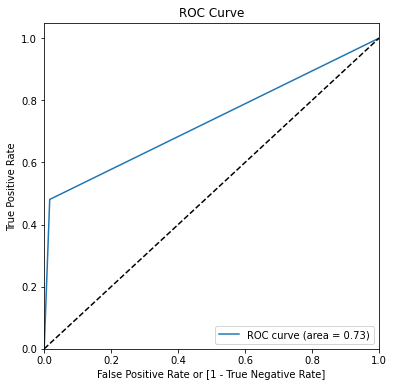

In [288]:
# ROC-AUC curve
draw_roc(Y_test, Y_pred)

## 
We have got the accuracy score of 94.18% with the best estimator which is slightly better than the Cross Validation mean score. Also the above Roc Curve seems to be in a good shape.
Nows let's see if we can optimize the cutoff further to minimize the False Negatives


 ## Optimal probability cutoff to minimize False Negatives
 

In [289]:
# Frame the dataset with the predicted probabilities
Y_pred_final = pd.DataFrame({'actual':Y_test,'pred_nonchurn_prob':Y_pred_proba[:,0],'pred_churn_prob':Y_pred_proba[:,1],'predicted':Y_pred})
Y_pred_final.head(5)

,actual,pred_nonchurn_prob,pred_churn_prob,predicted
id,,,,
58031,0,0.993076,0.006924,0
40592,0,0.450126,0.549874,1
29661,0,0.964222,0.035778,0
60988,0,0.995637,0.004363,0
12218,0,0.833235,0.166765,0


In [290]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_final[i]= Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > i else 0)
Y_pred_final.head()

,actual,pred_nonchurn_prob,pred_churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
id,,,,,,,,,,,,,,
58031,0,0.993076,0.006924,0,1,0,0,0,0,0,0,0,0,0
40592,0,0.450126,0.549874,1,1,1,1,1,1,1,0,0,0,0
29661,0,0.964222,0.035778,0,1,0,0,0,0,0,0,0,0,0
60988,0,0.995637,0.004363,0,1,0,0,0,0,0,0,0,0,0
12218,0,0.833235,0.166765,0,1,1,0,0,0,0,0,0,0,0


In [291]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( Y_pred_final['actual'], Y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083047  0.000000  1.000000
0.1   0.1  0.877022  0.887713  0.758977
0.2   0.2  0.929640  0.957059  0.626902
0.3   0.3  0.941013  0.975415  0.561169
0.4   0.4  0.943186  0.981368  0.521607
0.5   0.5  0.941771  0.983518  0.480828
0.6   0.6  0.939294  0.985999  0.423615
0.7   0.7  0.932471  0.991731  0.278150
0.8   0.8  0.922463  0.997850  0.090079
0.9   0.9  0.917206  0.999945  0.003652


<AxesSubplot:xlabel='prob'>

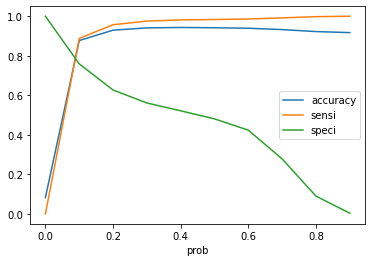

In [292]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [293]:
Y_pred_final['final_predicted'] = Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > 0.1 else 0)

## Final Model Evaluation

In [294]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(Y_test, Y_pred_final['final_predicted']))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_final['final_predicted']).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred_final['final_predicted'])


Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.89      0.93     18141
           1       0.38      0.76      0.51      1643

    accuracy                           0.88     19784
   macro avg       0.68      0.82      0.72     19784
weighted avg       0.93      0.88      0.89     19784


TN = 16104, FP = 2037, FN = 396, TP = 1247


Accuracy Score :  87.7
ROC AUC score :  82.33
Precision score :  37.97
Recall score :  75.9


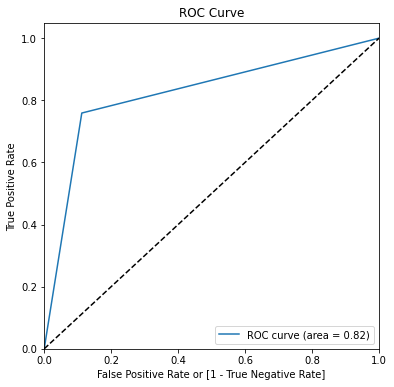

In [295]:
# ROC-AUC curve
draw_roc(Y_test, Y_pred_final['final_predicted'])

## Final Observation

## It is observed from the final observation that the accuracy score is around 82% and recall score with 75.9 % which is a good one

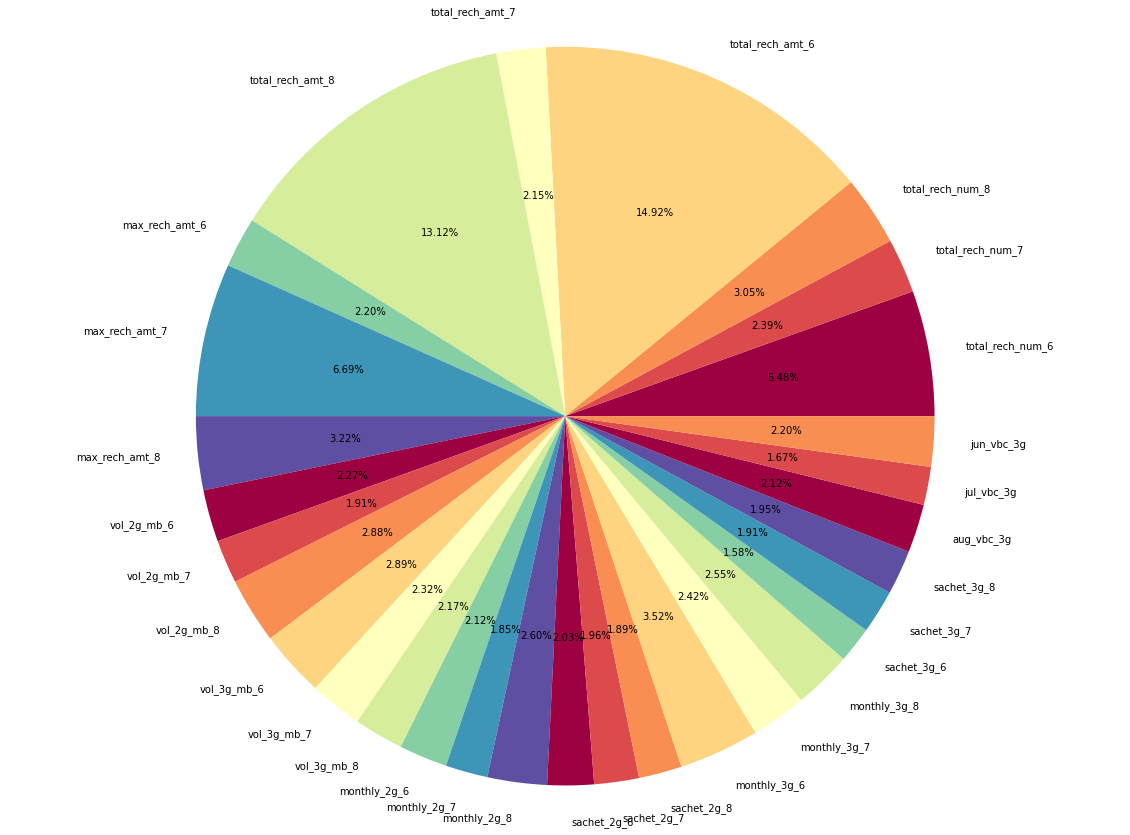

In [296]:
# Doing an observation of the data bfre feature engineering and which are uncorrelated
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

plt.figure(figsize=(20,15))
plt.pie(model2.feature_importances_, labels=new_vars, autopct='%2.2f%%', shadow=False, colors=colors)
plt.axis('equal')
plt.show()

### As per the graph it is clear that total recharge amount in the month of June and August were maximum. So it will be better if we focus on the customers who made the last recharge on the month of June and August.It will help us in getting maximum churn

## for kaggle upload creating submission.csv file

In [298]:
#Unseen Data
unseen.head()

In [300]:
unseen.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [301]:
new_vars

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [302]:
submission_data = unseen.set_index('id')[new_vars]
submission_data.shape

(30000, 30)

In [303]:
# Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [304]:
unseen['churn_probability'] = model2.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()


,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [305]:
## Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv

In [306]:
output.shape

(30000, 2)

In [320]:
#output.to_csv('submission_pca_lr_by_arunkumar.csv',index=False)
output.to_csv('submission.csv',index=False)